# Trainee: 
## U Bala Bhuvan Varma


In [2]:
# importing the necessary the packages. 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox


### 1. Data Understanding and EDA

In [3]:
# Loading the data as csv 
stock_data = pd.read_csv('stock_price.csv')
#printing the first ten lines of the stock data
stock_data = stock_data[::-1]
stock_data[:10]



,日付け,終値,始値,高値,安値,出来高,変化率 %
9201,1987-02-12,182.4,182.4,182.4,182.4,1.28B,16.25%
9200,1987-02-13,172.5,176.5,176.5,172.5,422.38M,-5.43%
9199,1987-02-16,175.5,166.7,175.5,165.7,360.51M,1.74%
9198,1987-02-17,182.4,176.5,184.3,175.5,881.51M,3.93%
9197,1987-02-18,191.2,186.3,191.2,186.3,795.09M,4.82%
9196,1987-02-19,196.1,196.1,196.1,193.1,748.25M,2.56%
9195,1987-02-20,210.8,200.0,211.8,200.0,902.27M,7.50%
9194,1987-02-23,235.3,214.7,235.3,211.8,798.79M,11.62%
9193,1987-02-24,270.6,258.8,272.5,257.8,605.42M,15.00%
9192,1987-02-25,252.9,258.8,262.7,252.0,733.93M,-6.54%


In [4]:
# As the columns Yield and Rate of change are in format we are removing formats and convert them into float.
# to perform statistics.
stock_data.dtypes

日付け       object
終値       float64
始値       float64
高値       float64
安値       float64
出来高       object
変化率 %     object
dtype: object

In [5]:
# Converting object to float type for calculations.
columns_to_convert = ['出来高', '変化率 %']
def object_to_float(value):
    if 'M' in value:
        return float(value.replace('M', '')) * 1000000
    elif 'B' in value:
        return float(value.replace('B', '')) * 1000000000
    elif '%' in value:
        return float(value.replace('%', '')) * 0.01
    else:
        return float(value)

stock_data['出来高'] = stock_data["出来高"].apply(object_to_float)
stock_data["変化率 %"] = stock_data["変化率 %"].apply(object_to_float)


In [6]:
#checking the data types of the columns in the dataframe:
stock_data.dtypes

日付け       object
終値       float64
始値       float64
高値       float64
安値       float64
出来高      float64
変化率 %    float64
dtype: object

In [7]:
# Basic Statistics of the data.
stock_data.describe()
# contains the minimum, maximum, average, standard deviation, 25%, 50% and 75% 

,終値,始値,高値,安値,出来高,変化率 %
count,9202.000000,9202.000000,9202.000000,9202.000000,9.202000e+03,9202.000000
mean,92.180961,92.256183,93.176451,91.330146,1.726677e+08,0.000175
std,50.452228,50.598215,51.049837,50.087405,1.251280e+08,0.018767
min,33.000000,33.000000,33.200000,32.200000,9.340000e+06,-0.147400
25%,52.000000,52.100000,52.800000,51.500000,8.073000e+07,-0.009400
50%,85.100000,85.100000,86.050000,84.200000,1.540150e+08,0.000000
75%,110.800000,110.800000,111.900000,109.275000,2.305225e+08,0.009000
max,305.900000,309.800000,311.800000,303.900000,1.280000e+09,0.162500


In [8]:
stock_data['日付け'] = pd.to_datetime(stock_data["日付け"])
stock_data.set_index("日付け", inplace=True)
stock_data

,終値,始値,高値,安値,出来高,変化率 %
日付け,,,,,,
1987-02-12,182.4,182.4,182.4,182.4,1.280000e+09,0.1625
1987-02-13,172.5,176.5,176.5,172.5,4.223800e+08,-0.0543
1987-02-16,175.5,166.7,175.5,165.7,3.605100e+08,0.0174
1987-02-17,182.4,176.5,184.3,175.5,8.815100e+08,0.0393
1987-02-18,191.2,186.3,191.2,186.3,7.950900e+08,0.0482
...,...,...,...,...,...,...
2024-07-26,157.9,159.3,159.6,157.9,1.550800e+08,-0.0013
2024-07-29,159.7,158.7,160.2,158.4,1.262800e+08,0.0114
2024-07-30,158.7,158.8,159.2,158.0,1.381400e+08,-0.0063


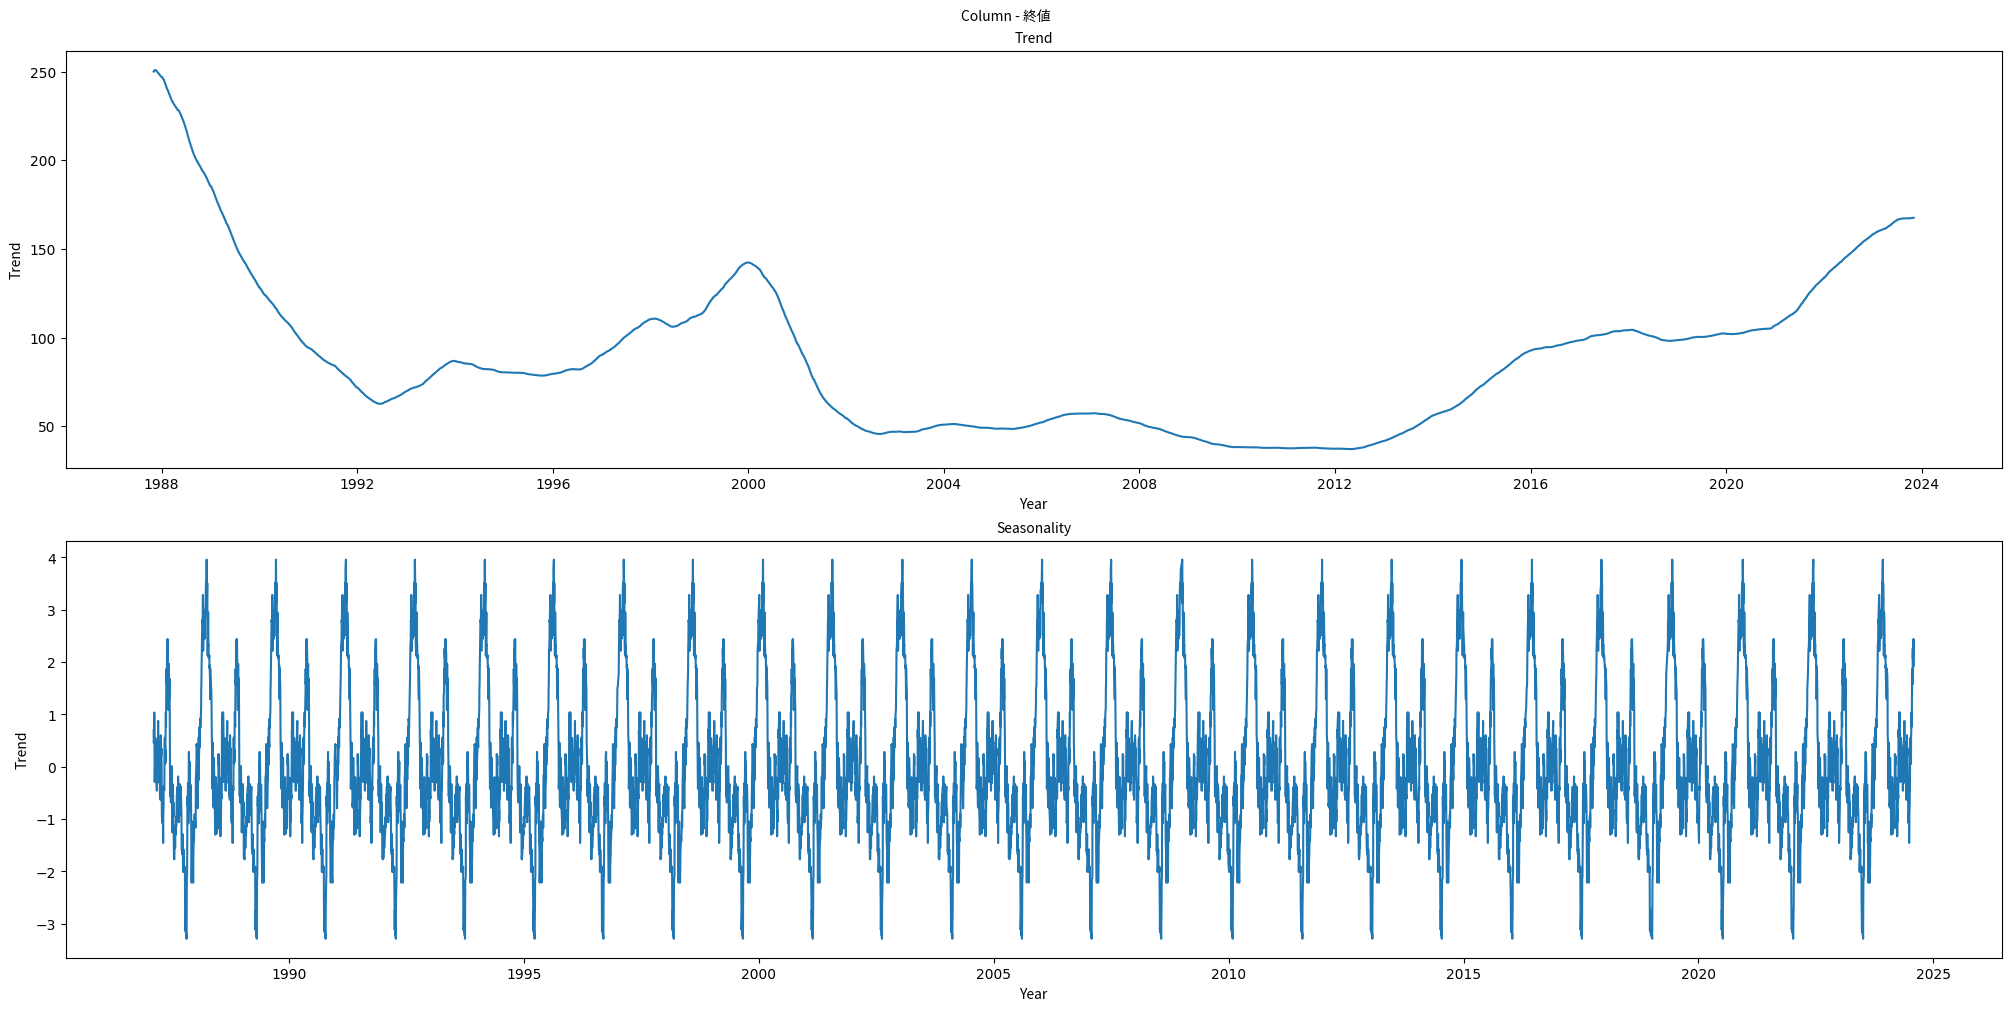

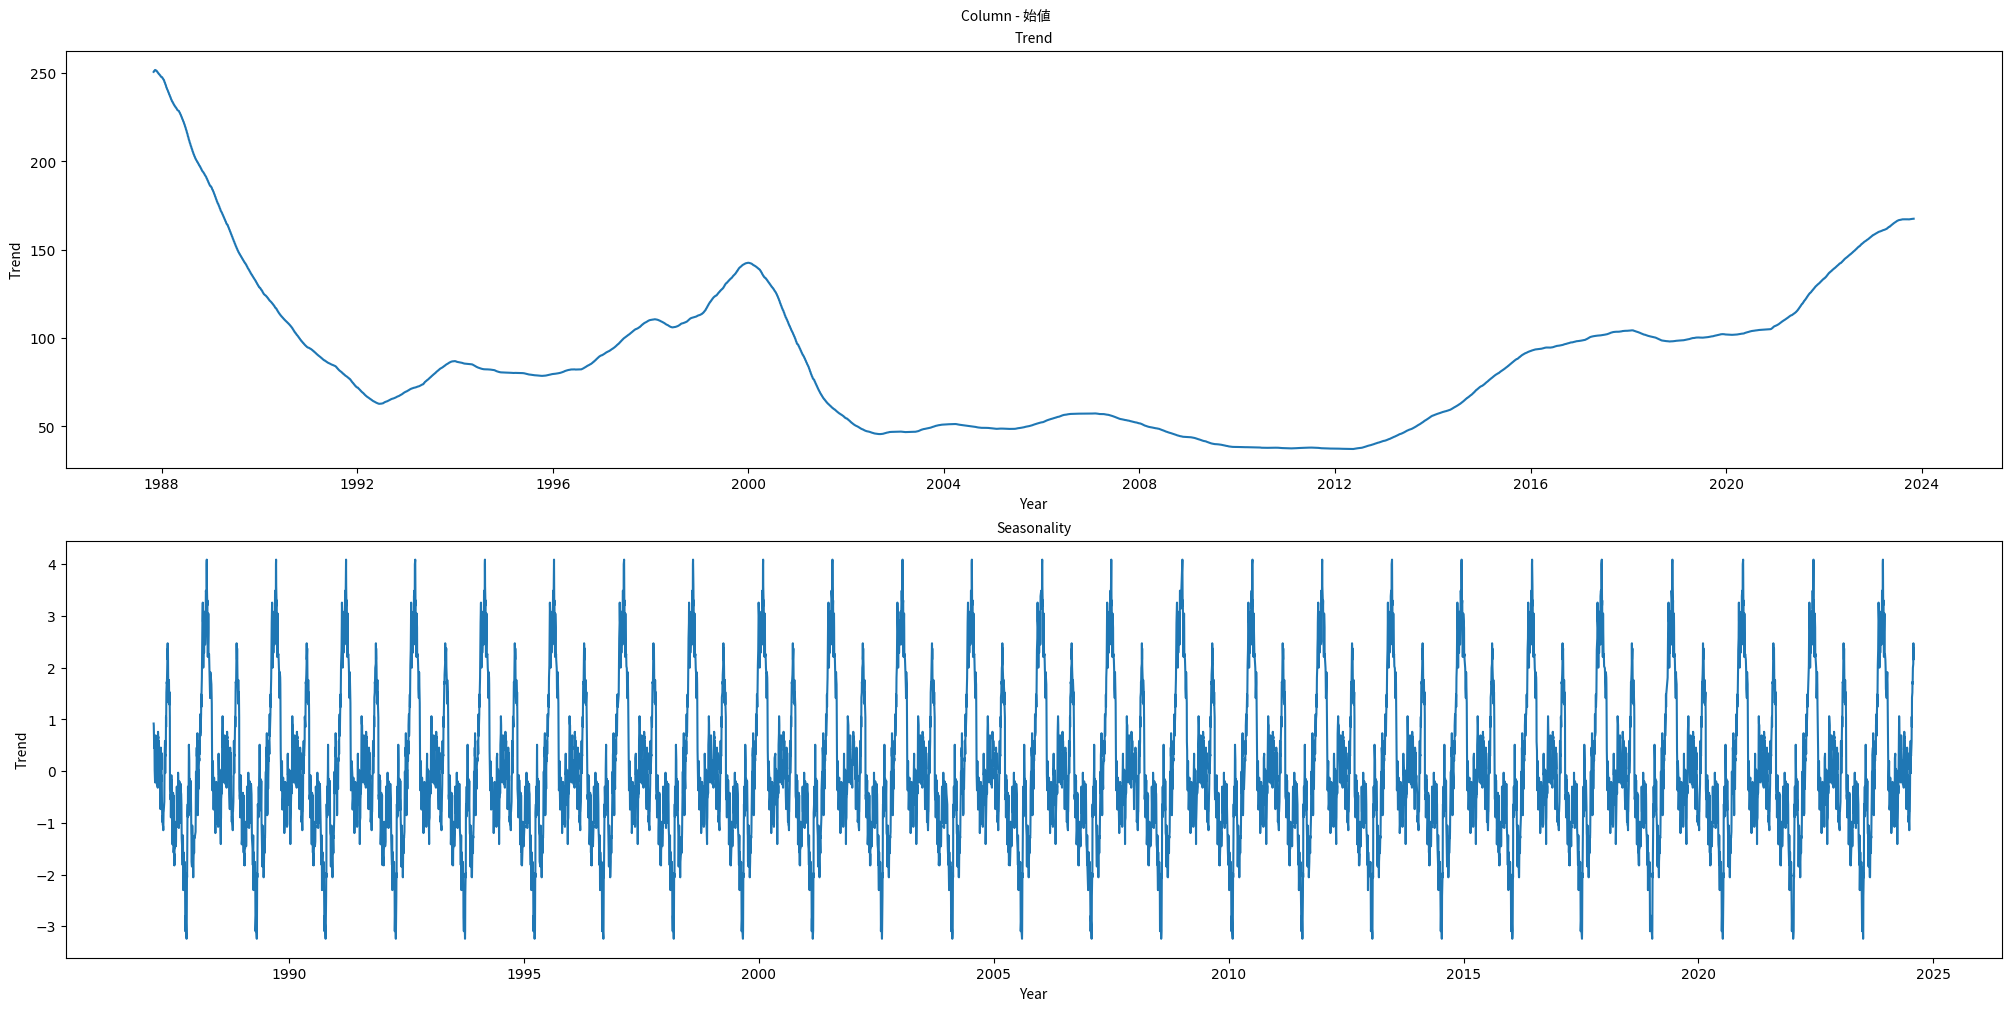

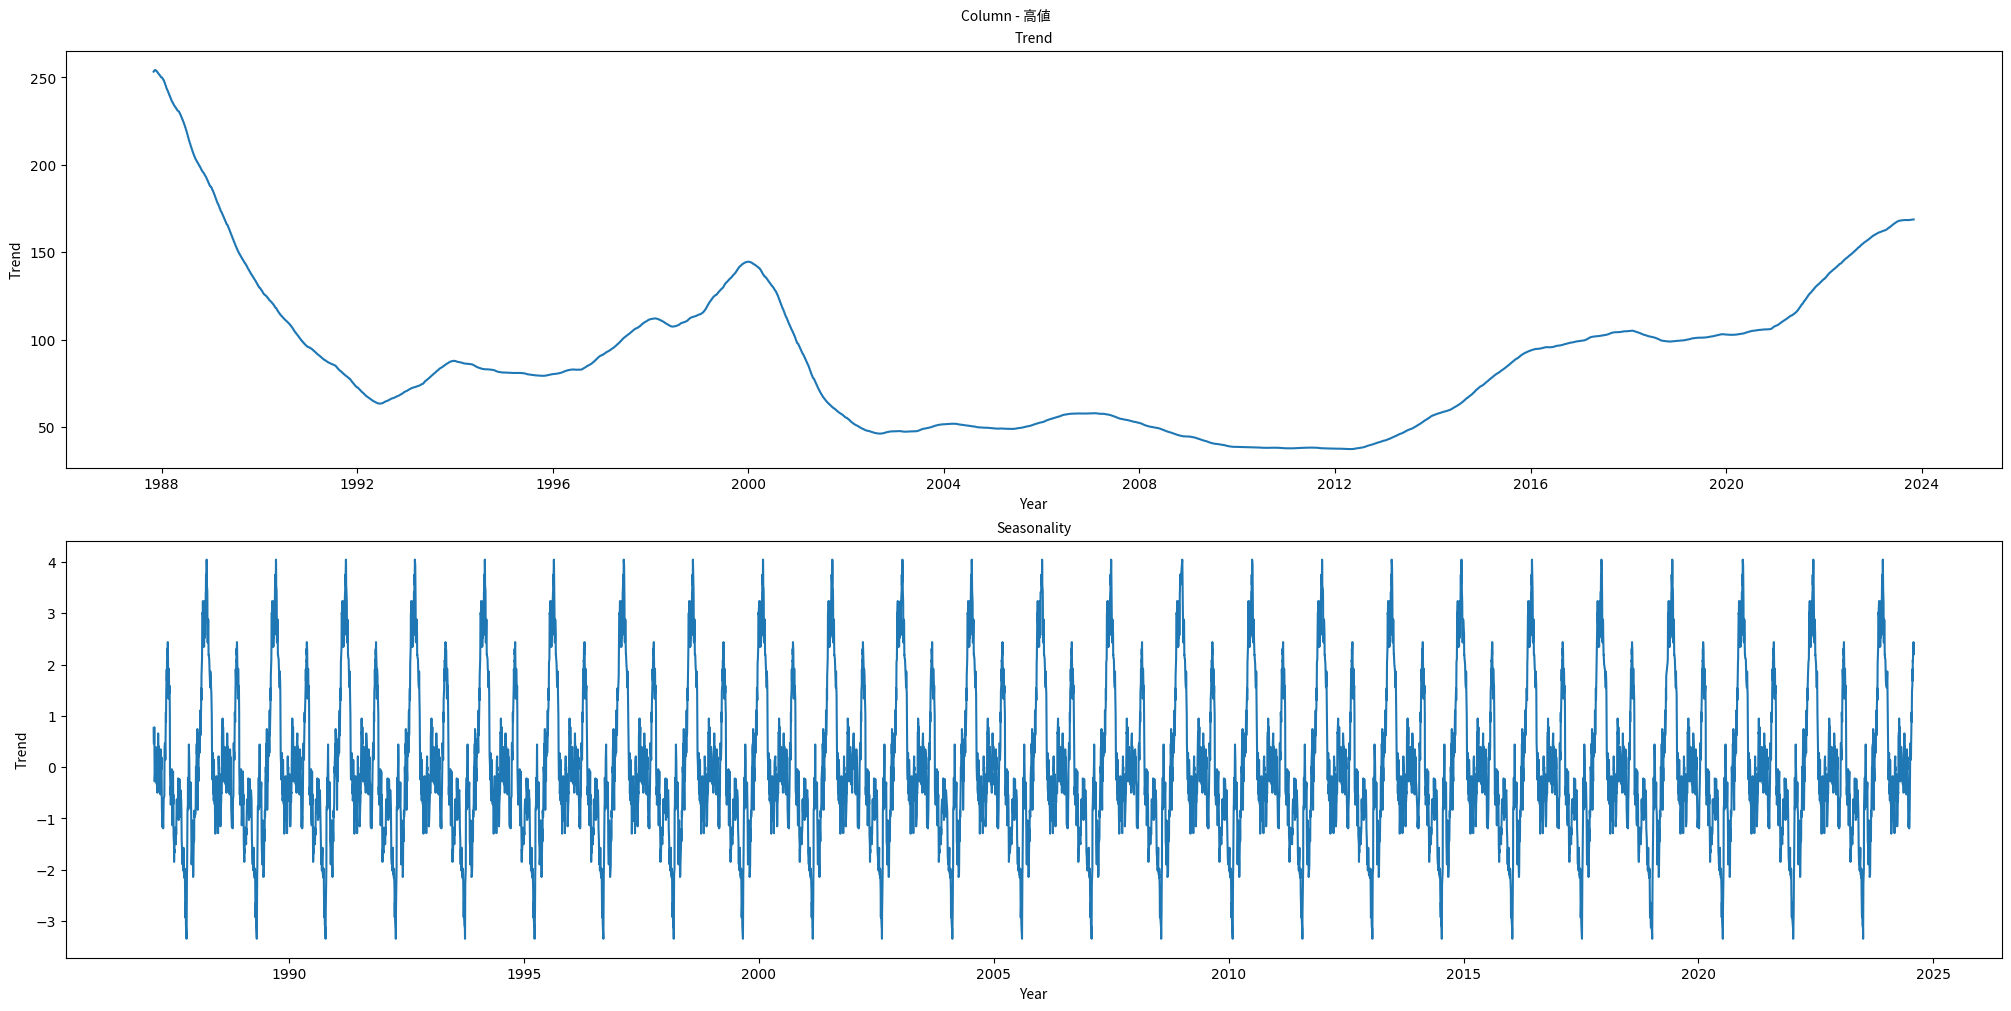

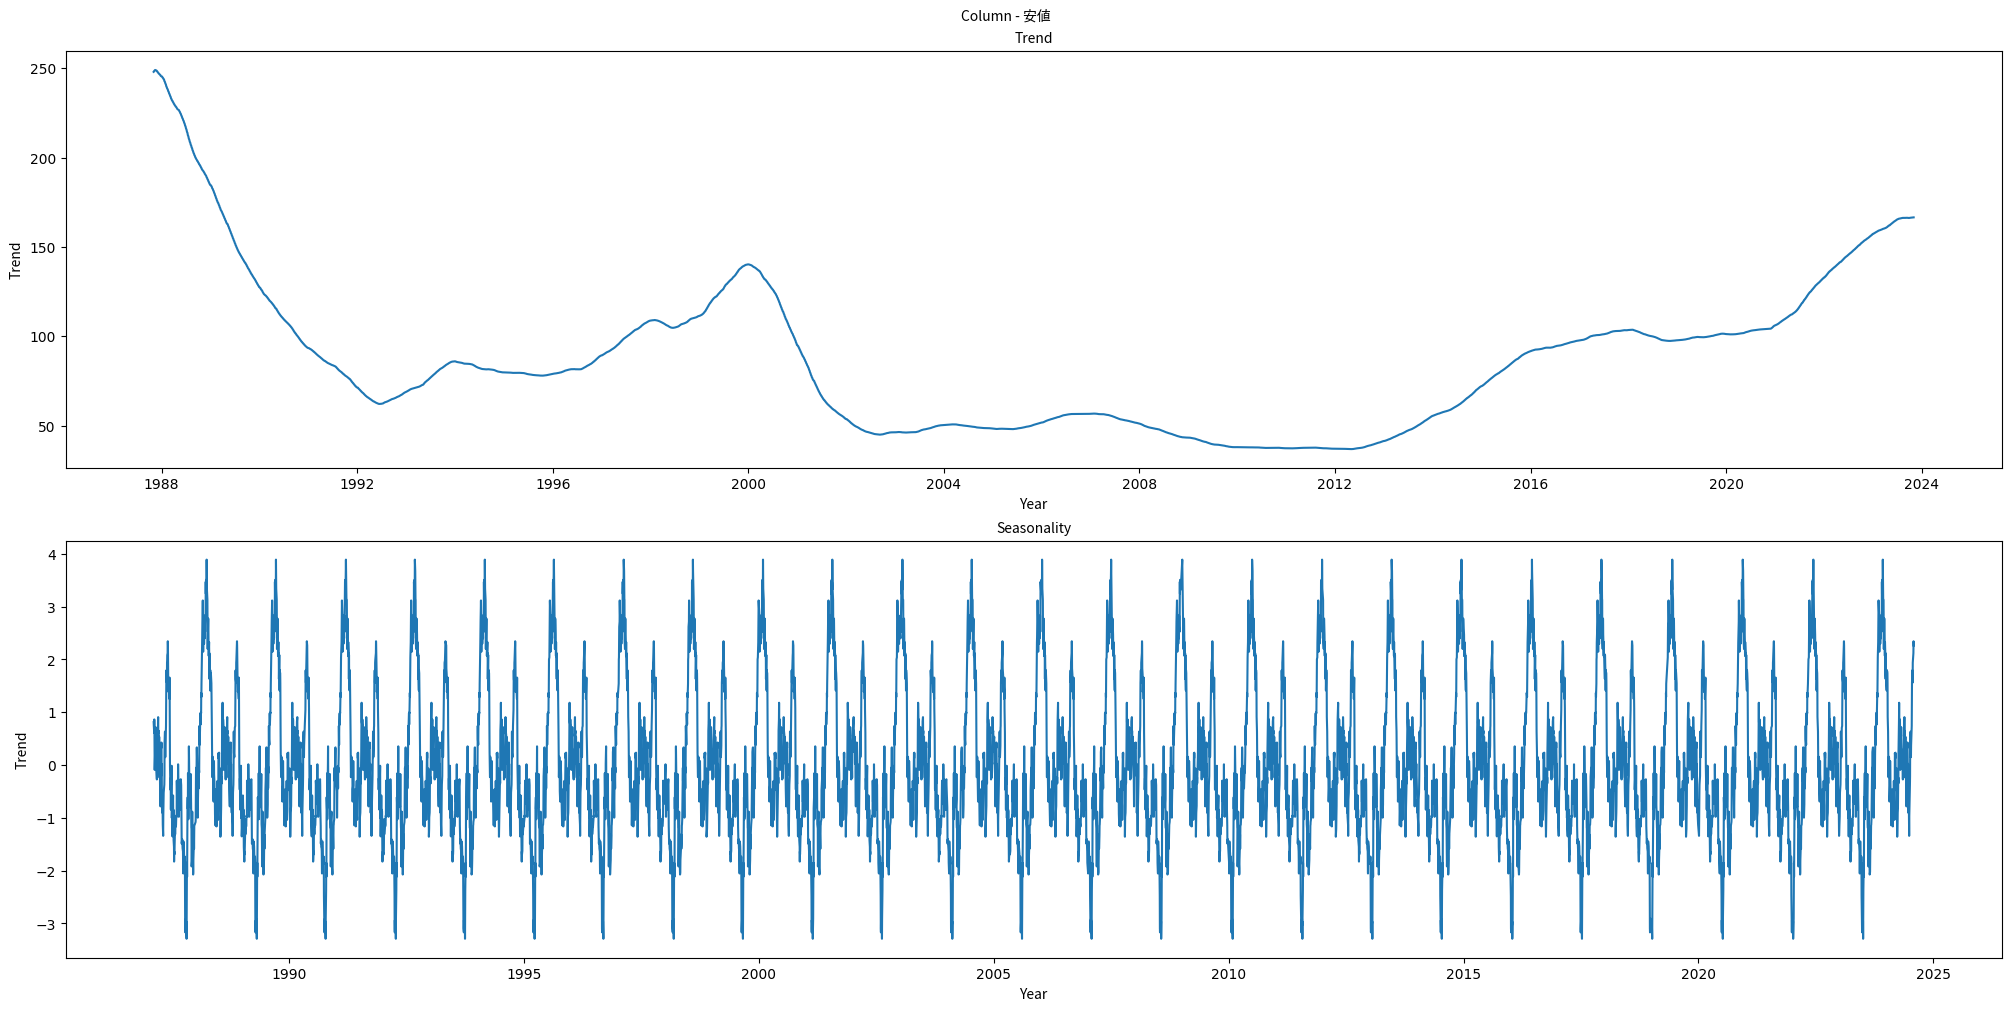

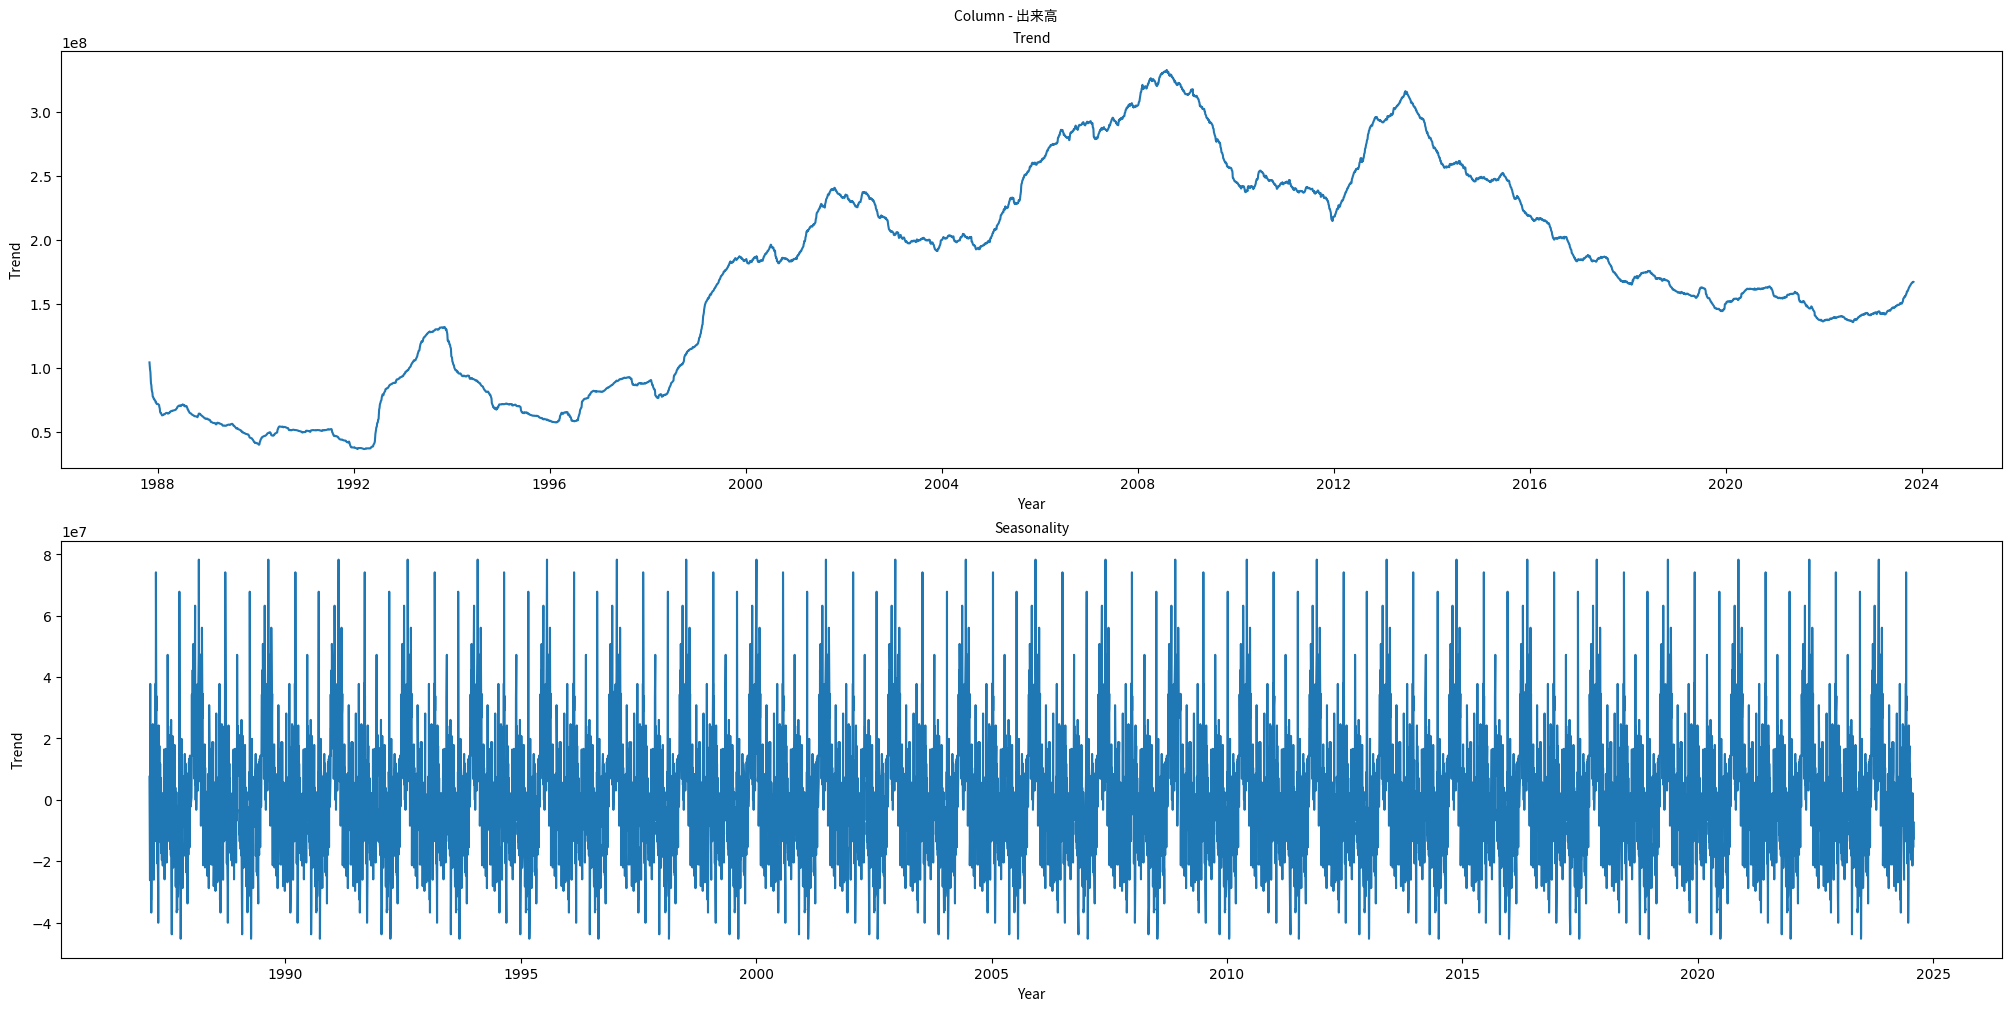

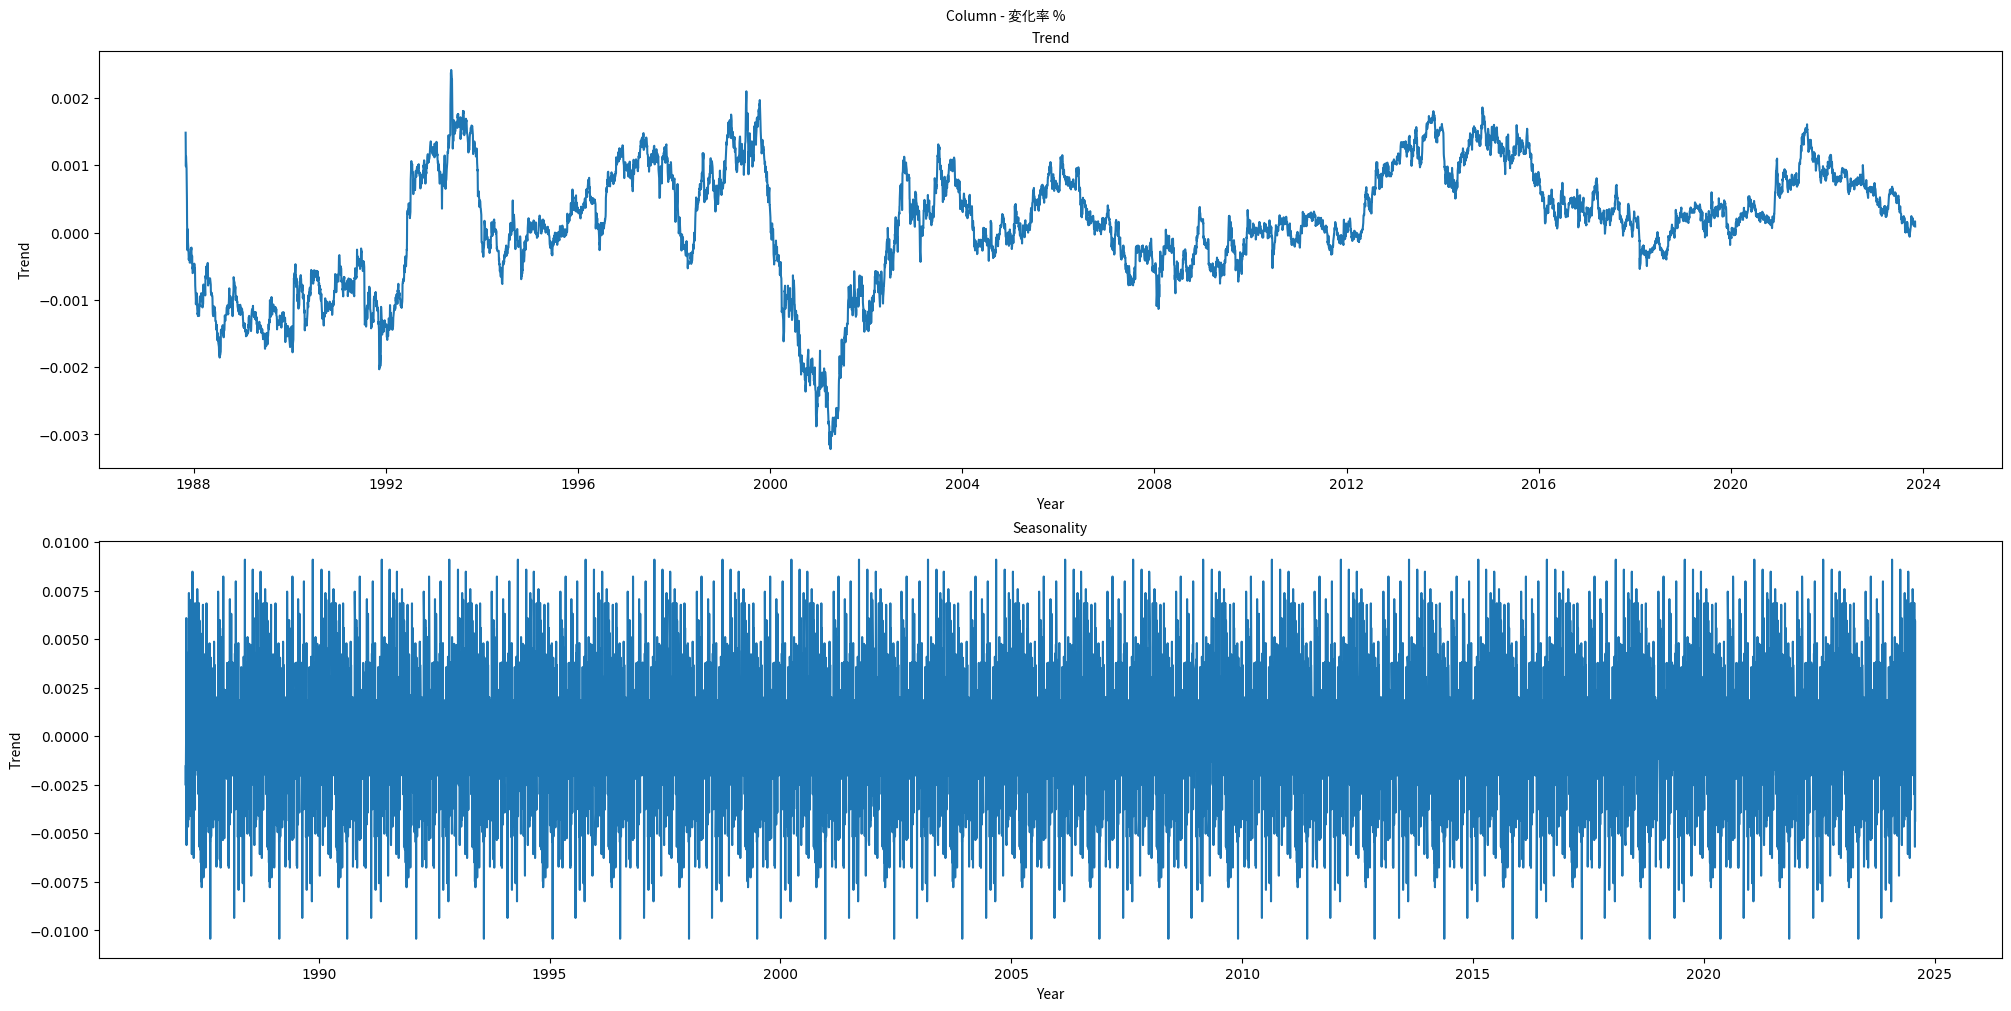

In [9]:
count = 0
font_path = '/home/bhuvan/NTT_Prediction/NotoSansJP-Regular.otf'
font_prop = matplotlib.font_manager.FontProperties(fname=font_path)
for i in list(stock_data.columns):
    fig, axs = plt.subplots(2, 1, constrained_layout=True, figsize=(20, 10))
    column = stock_data[i]
    decomposition = sm.tsa.seasonal_decompose(column, model='additive', period=365)
    trend = decomposition.trend
    seasonal = decomposition.seasonal

    # Print or plot each component separately
    axs[0].plot(trend)
    axs[0].set_title("Trend", fontproperties=font_prop)
    axs[0].set_xlabel("Year", fontproperties=font_prop)
    axs[0].set_ylabel("Trend", fontproperties=font_prop)

    fig.suptitle(u'Column - {}'.format(i), fontproperties=font_prop)

    axs[1].plot(seasonal)
    axs[1].set_title("Seasonality", fontproperties=font_prop)
    axs[1].set_xlabel("Year", fontproperties=font_prop)
    axs[1].set_ylabel("Trend", fontproperties=font_prop)
    count += 1
    plt.show()




#### calculating outliers

In [ ]:
for i in list(stock_data.columns):
    fig, axs = plt.subplots(1,1, constrained_layout=True, figsize=(8,8))

    axs.boxplot(stock_data[i])
    axs.set_title(u'Column - {}'.format(i), fontproperties=font_prop)
    axs.set_ylabel(f"{i}", fontproperties=font_prop)
    plt.show()

### 2. Data Preprocessing and feature engineering: 

In [10]:
# checking for missing values: 
stock_data.isnull().sum()

終値       0
始値       0
高値       0
安値       0
出来高      0
変化率 %    0
dtype: int64

In [11]:
# as you can see no missing values in the data. life's easy

In [12]:

# independent features are : high, low, start price, yield, and rate of change. 
independent_features = ['始値', '高値', '安値', '出来高', '変化率 %'] 

# dependent vairable/ target is closing price. Because, closing price is a critical measure in trading, 
# it reflects the final traded price for a stock on a particular day. 
target_variable = ['終値']

X = stock_data[independent_features]
Y = stock_data[target_variable]

# Scaling the data. Because the scale of yield and rate of change are completely different than the 
# high, low, and start prices. To enhance the performance of the model and improve accuracy. 
# using the robust scaler, because it is based on media and interquartile. Which is robust in case of 
# more outliers in the data. 

# in the above box plots, we can see more outliers in the data. 
scaler = RobustScaler()
X_norm = scaler.fit_transform(X)
Y_norm = scaler.fit_transform(Y)


# splitting the data into train and test for prediction. 

X_train, X_test, Y_train,  Y_test = train_test_split(X_norm, Y_norm, random_state=1, test_size=0.25, shuffle=True)
print("shape of X_train {}".format(X_train.shape))
print("shape of Y_train {}".format(Y_train.shape))
print("shape of X_test {}".format(X_test.shape))
print("shape of Y_test {}".format(Y_test.shape))





shape of X_train (6901, 5)
shape of Y_train (6901, 1)
shape of X_test (2301, 5)
shape of Y_test (2301, 1)


### 3. Model Selection and Training:
- Choosing VAR(vector autoregression) and Facebook Prophet based prediction. 
- Reasons: 
    - As the trend is not consistent and seasonality is present, in the data (from the plots). So the data is not 
      not stationary. So ARIMA is not a good choice because it assumes the data is stationary.
    - And we are capturing multivariable time series forecasting. 

In [13]:
# implementing VAR model
X_norm_df = pd.DataFrame(X_norm, columns=independent_features, index=list(stock_data.index))
X_norm_df.index.name = '日付け'
Y_norm_df = pd.DataFrame(Y_norm, columns=target_variable, index=list(stock_data.index))
Y_norm_df.index.name = '日付け'
stock_data_norm = pd.merge(X_norm_df, Y_norm_df, on='日付け')
# checking for stationarity, 
for feature in list(stock_data_norm.columns):
    print("Feature -------------- {}".format(feature))
    result = adfuller(stock_data_norm[feature])
    print('ADF Statistic: ', result[0])
    print('p-value: ', result[1])
    print('Critical Values: ')
    for k, v in result[4].items():
        print('\t%s: %.3f' % (k, v))


Feature -------------- 始値
ADF Statistic:  -3.064186047240315
p-value:  0.02931963138282602
Critical Values: 
	1%: -3.431
	5%: -2.862
	10%: -2.567
Feature -------------- 高値
ADF Statistic:  -3.134233921861873
p-value:  0.024121288411341337
Critical Values: 
	1%: -3.431
	5%: -2.862
	10%: -2.567
Feature -------------- 安値
ADF Statistic:  -3.055007415134473
p-value:  0.030067028147964733
Critical Values: 
	1%: -3.431
	5%: -2.862
	10%: -2.567
Feature -------------- 出来高
ADF Statistic:  -5.955762436827661
p-value:  2.0951716052901256e-07
Critical Values: 
	1%: -3.431
	5%: -2.862
	10%: -2.567
Feature -------------- 変化率 %
ADF Statistic:  -30.788802160619838
p-value:  0.0
Critical Values: 
	1%: -3.431
	5%: -2.862
	10%: -2.567
Feature -------------- 終値
ADF Statistic:  -3.5831920709837712
p-value:  0.006090609914957036
Critical Values: 
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [30]:
# VAR model, 
train_stock_data = stock_data[:-10]
test_stock_data = stock_data[-10:]
model = VAR(train_stock_data)
lag_order = model.select_order(maxlags=20)
print(lag_order.summary())

/home/bhuvan/anaconda3/envs/dcAss/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        35.59       35.60   2.875e+15       35.60
1        26.20       26.24   2.400e+11       26.22
2        26.06       26.12   2.075e+11       26.08
3        25.99       26.08   1.946e+11       26.02
4        25.96      26.08*   1.881e+11       26.00
5        25.94       26.08   1.836e+11       25.99
6        25.92       26.09   1.805e+11       25.98
7        25.90       26.11   1.780e+11       25.97
8        25.89       26.12   1.748e+11      25.96*
9        25.88       26.13   1.732e+11       25.96
10       25.87       26.15   1.717e+11       25.97
11       25.86       26.18   1.707e+11       25.97
12       25.86       26.20   1.695e+11       25.97
13       25.85       26.22   1.689e+11       25.98
14       25.85       26.24   1.677e+11       25.98
15       25.84       26.26   1.665e+11       25.98
16       25.83       26.28   1.

In [33]:
results = model.fit(lag_order.aic)
forecast = results.forecast(train_stock_data.values[-lag_order.aic:], steps=len(test_stock_data))
#metrics 
mse = mean_squared_error(test_stock_data, forecast)
print(f'Mean squared error: {mse}')

Mean squared error: 548721632388746.94


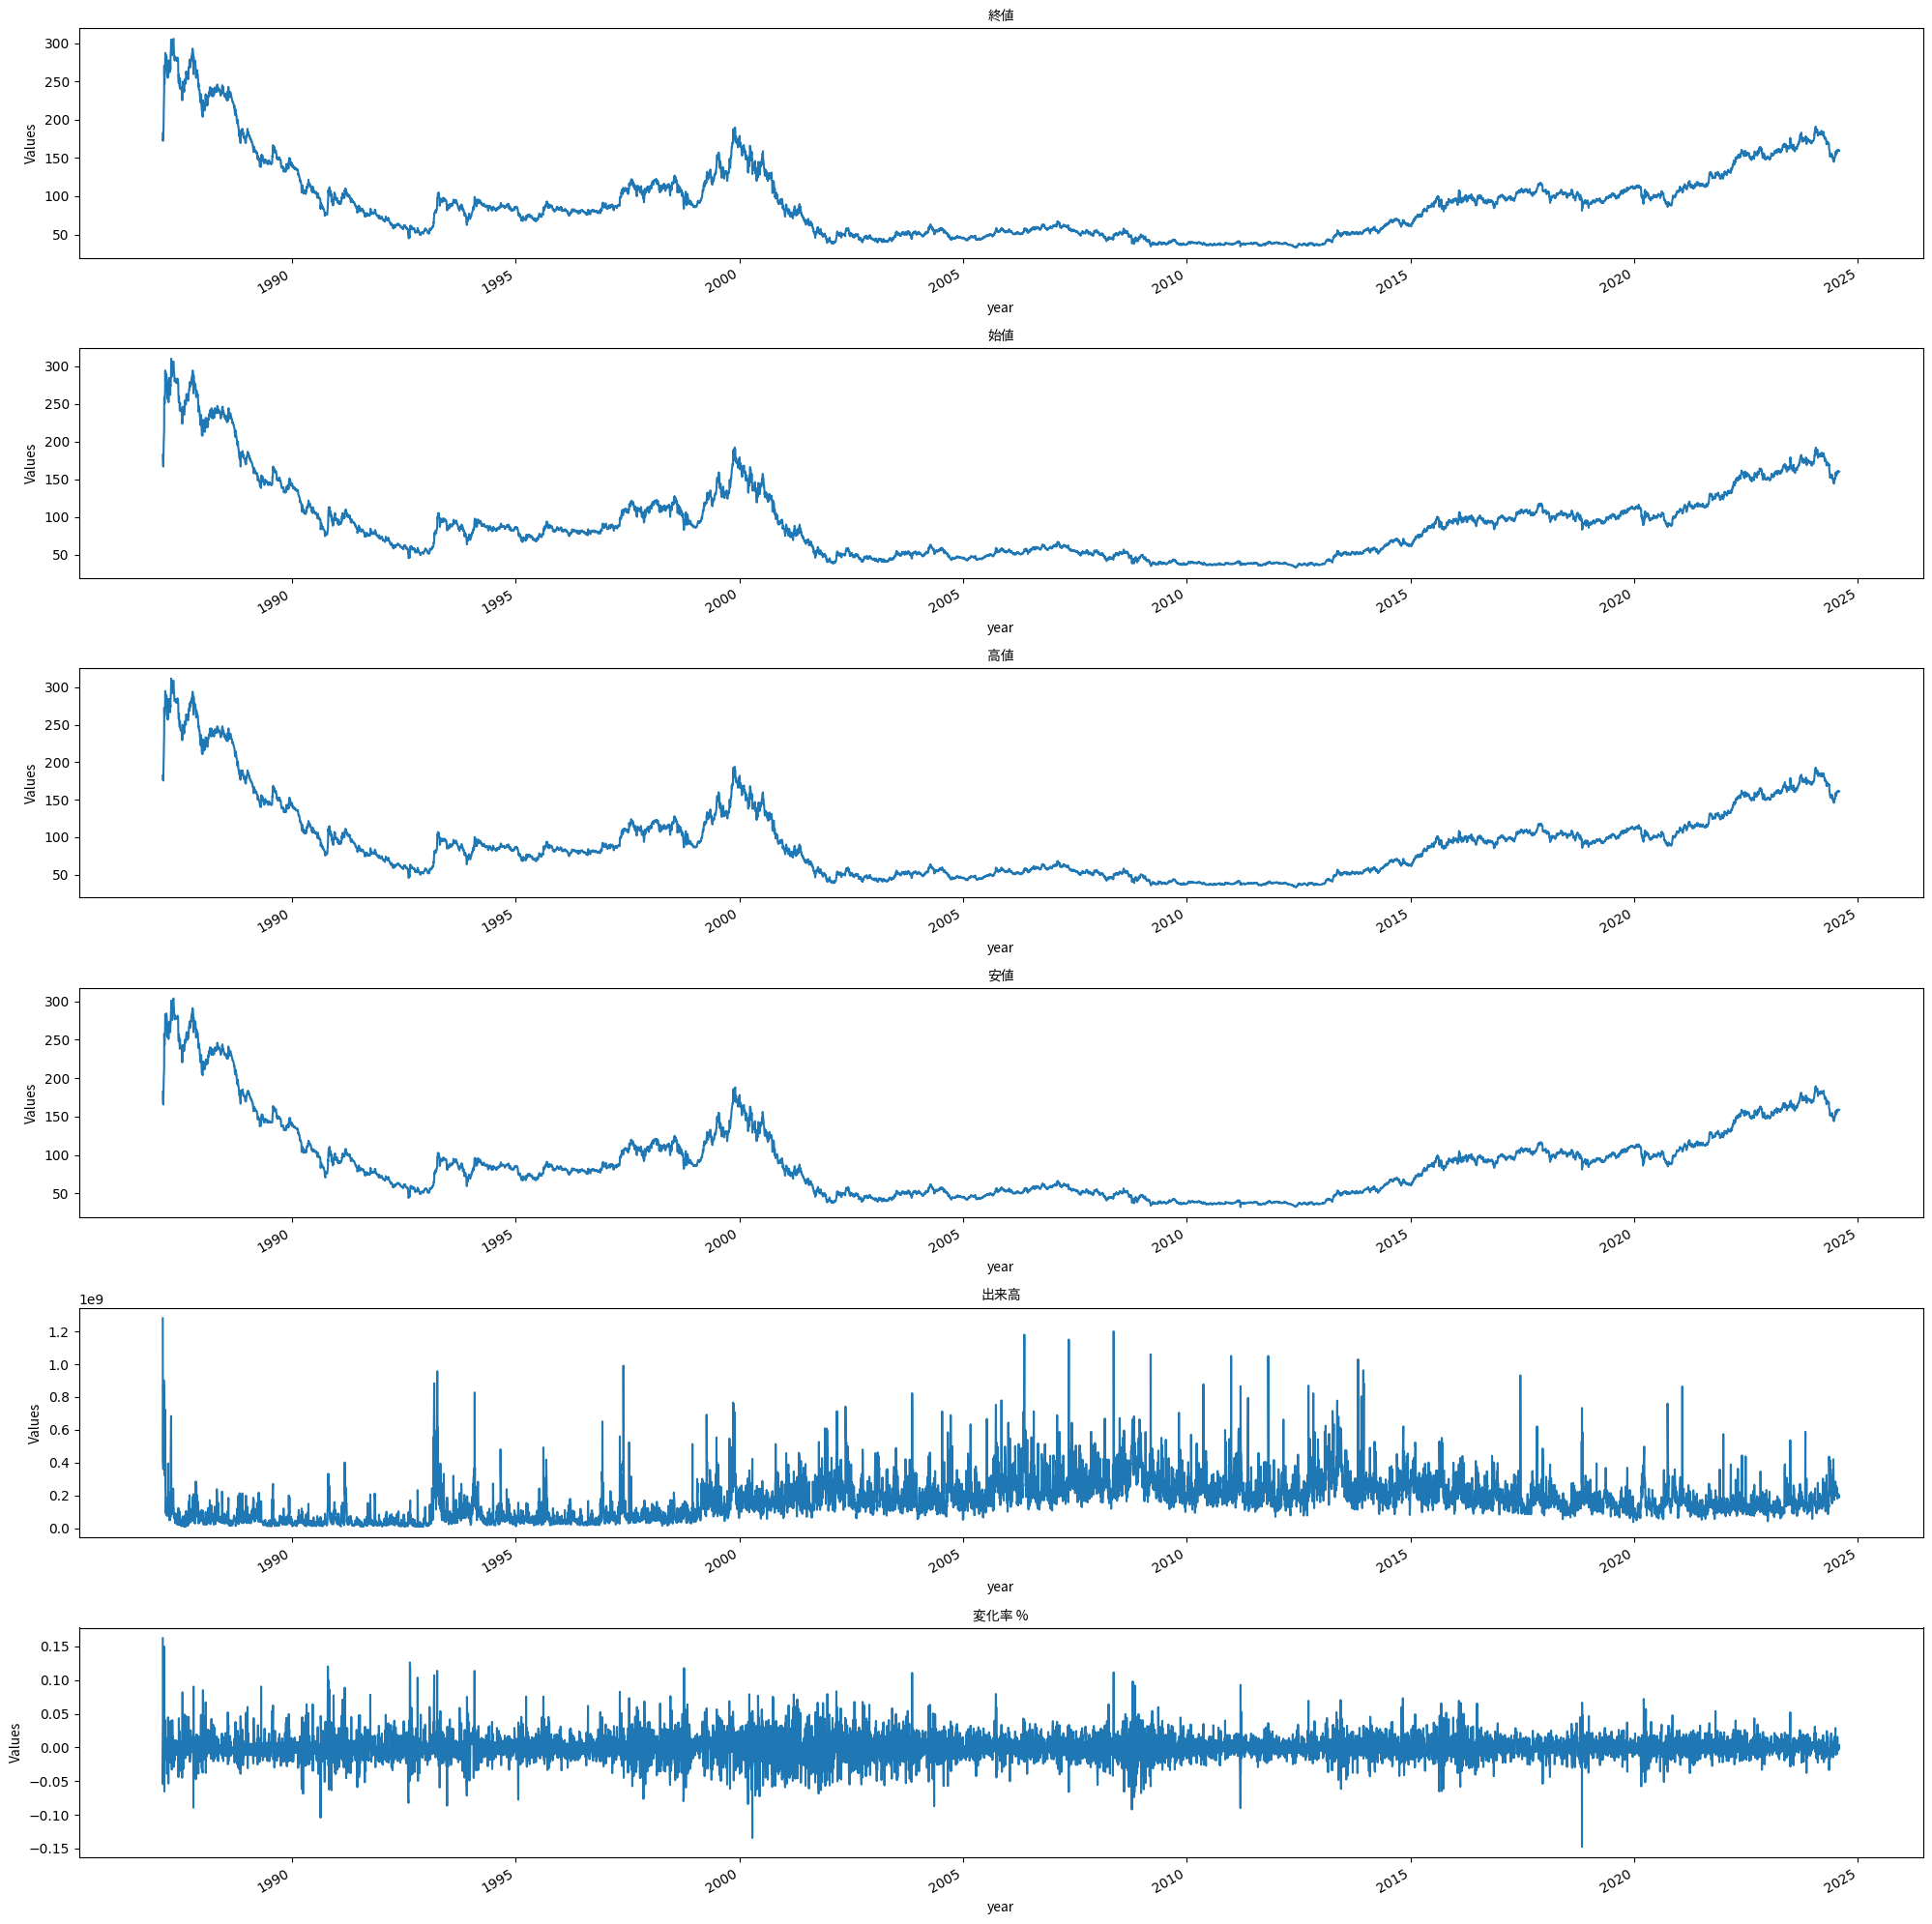

In [39]:
def plot_series(data):
    fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(20, 20))
    for i, col in enumerate(data.columns):
        data[col].plot(ax=axes[i])
        axes[i].set_title(f'{col}', fontproperties=font_prop)
        axes[i].set_ylabel('Values', fontproperties=font_prop)
        axes[i].set_xlabel('year', fontproperties=font_prop)
    plt.tight_layout()
    plt.show()
forecast = results.forecast(train_stock_data.values[-lag_order.aic:], steps=10)
# forecast_index = pd.date_range(start='2024-07-19', periods=10)
forecast_data = pd.DataFrame(forecast, index=test_stock_data.index, columns=stock_data.columns)
plot_series(pd.concat([train_stock_data, forecast_data]))

In [24]:
test_stock_data


,終値,始値,高値,安値,出来高,変化率 %
日付け,,,,,,
2024-07-19,159.0,160.1,160.9,158.7,166570000.0,-0.0112
2024-07-22,159.9,159.5,159.9,157.9,136120000.0,0.0057
2024-07-23,160.7,161.6,161.7,159.8,165790000.0,0.0050
2024-07-24,158.5,160.0,160.4,158.4,168570000.0,-0.0137
2024-07-25,158.1,157.0,159.0,156.8,190620000.0,-0.0025
2024-07-26,157.9,159.3,159.6,157.9,155080000.0,-0.0013
2024-07-29,159.7,158.7,160.2,158.4,126280000.0,0.0114
2024-07-30,158.7,158.8,159.2,158.0,138140000.0,-0.0063
2024-07-31,160.4,158.2,160.7,158.1,173910000.0,0.0107


In [40]:
forecast_data

,終値,始値,高値,安値,出来高,変化率 %
日付け,,,,,,
2024-07-19,160.055313,160.638919,161.549098,159.038466,2.038187e+08,-0.004307
2024-07-22,159.916565,159.904744,161.201703,158.543264,2.043840e+08,-0.001300
2024-07-23,160.111093,160.111755,161.380665,158.832341,2.056688e+08,0.000659
2024-07-24,160.354385,160.310079,161.663100,159.068021,2.106792e+08,0.003226
2024-07-25,159.613553,160.378412,161.134888,158.895698,1.948733e+08,-0.002994
2024-07-26,159.700382,159.818133,161.122664,158.413128,2.004916e+08,0.000943
2024-07-29,159.315365,159.474179,160.727544,158.081445,1.977582e+08,-0.002039
2024-07-30,159.350218,159.399237,160.649478,158.150778,1.950436e+08,0.000475
2024-07-31,159.835154,159.663441,161.071468,158.430182,2.023470e+08,0.003872


In [10]:
# implementing SARIMA 
# for SARIMAX model, we are considering only closing price as the target. 

closingPriceData = stock_data["終値"]
result = adfuller(closingPriceData)
print('ADF Statistic:', result[0])
print('p-value:, ' ,result[1])


ADF Statistic: -3.5831920709837717
p-value:,  0.006090609914957023


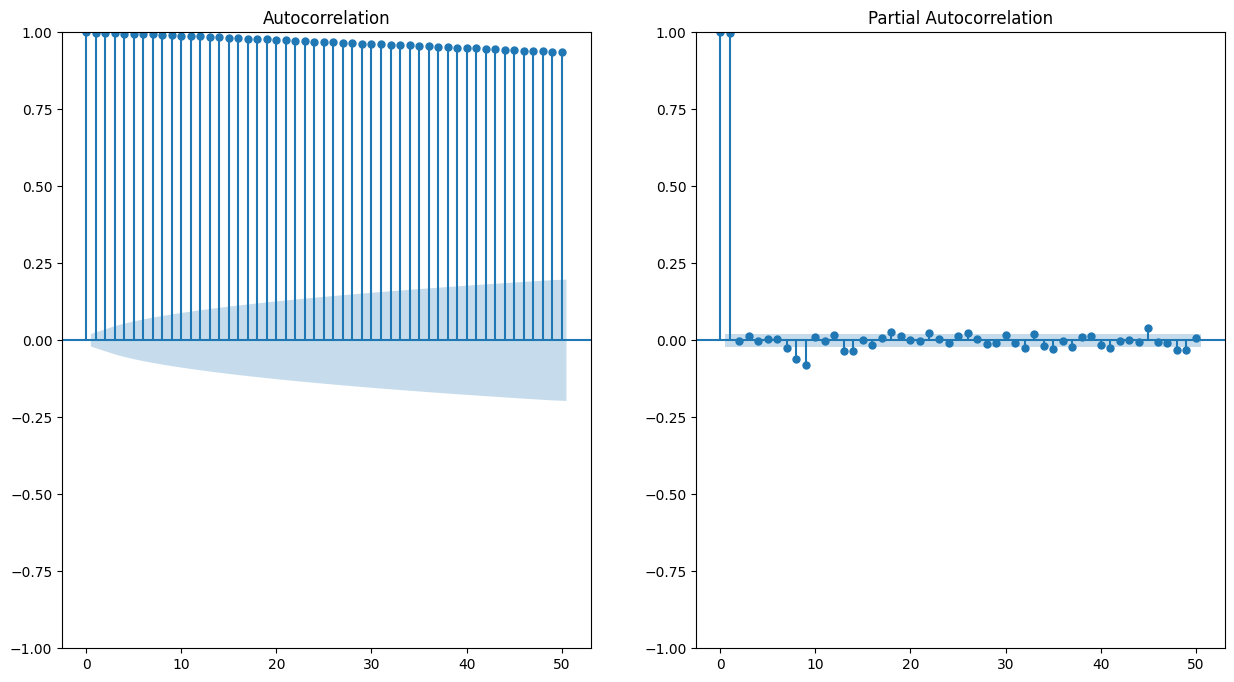

In [11]:
# as p-value is less than 0.05, we reject the null hypothesis that is "closing Price" Series
# That is , we reject that "closing Price" is not-stationary. 
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sm.graphics.tsa.plot_acf(closingPriceData, lags=50, ax=ax[0])
sm.graphics.tsa.plot_pacf(closingPriceData, lags=50, ax=ax[1])
plt.show()

In [12]:
# taking p = 7, d = 0, q = 1 , for both we are using 
# choosing P = 0, D = 0, Q = 49, S = 730

sarimaModel = sm.tsa.SARIMAX(closingPriceData, order=(7,1,1), seasonal_order=(1,1,49,730))
results = sarimaModel.fit()

forecast = results.get_forecast(steps=10)
print(forecast)

/home/bhuvan/anaconda3/envs/dcAss/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/bhuvan/anaconda3/envs/dcAss/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


: 